In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import stockutils

stockdf, targetdf, otherdf = stockutils.import_stock_csv("AAPL_Advanced.csv")

In [8]:
stockdf.head()

,pct_Diff_from_6_day_SMA,Slope_6_day_SMA,Slope_4_day_SMA,CHLI_1Y,CHLI_1M,CHLI_2W,CHLI_1W,ADV_Issues,ADV_Vol,ADV_Issues_Comp,...,2yr_pct_chg,10yr_pct_chg,10yr_2yr_diff,10_2_diff_pct_chg,10_day_SMA,20_day_SMA,10_day_SMA_slope,20_day_SMA_slope,price_chg,vix_chg
date,,,,,,,,,,,,,,,,,,,,,
1/13/2015,0.006,0.006076,0.005625,0.519531,0.514604,0.412021,0.533840,0.487687,0.384596,0.485272,...,-0.014572,-0.002095,1.364,0.002941,27.39650,27.625750,-0.003356,0.000222,0.008879,0.96
1/14/2015,-0.003,0.005385,-0.004727,0.255924,0.239757,0.165829,0.219436,0.354120,0.325418,0.361974,...,-0.073937,-0.026247,1.354,-0.007331,27.32850,27.645440,-0.002482,0.000713,-0.003811,0.92
1/15/2015,-0.028,-0.001407,-0.011748,0.204082,0.179878,0.129602,0.179167,0.215686,0.145983,0.217218,...,-0.161677,-0.068464,1.308,-0.033973,27.23950,27.646375,-0.003257,0.000034,-0.027140,0.91
1/16/2015,-0.027,-0.008940,-0.007485,0.282353,0.257827,0.183930,0.268229,0.761533,0.803568,0.756293,...,0.161905,0.059606,1.343,0.026758,27.15600,27.603625,-0.003065,-0.001546,-0.007770,-1.44
1/20/2015,0.002,-0.005030,-0.003475,0.436364,0.394945,0.364068,0.463512,0.413196,0.522722,0.407381,...,0.022541,-0.021846,1.292,-0.037975,27.21775,27.554500,0.002274,-0.001780,0.025757,-1.06


In [9]:
targetdf.head()

,DayAfterMajorReversal
date,
1/13/2015,HOLD
1/14/2015,HOLD
1/15/2015,HOLD
1/16/2015,HOLD
1/20/2015,BUY


In [32]:
#zipped_df = stockdf.copy()
otherdf['Target'] = targetdf['DayAfterMajorReversal']
stockdf['Target'] = targetdf['DayAfterMajorReversal']

In [24]:
otherdf.head()

,close,vix,2yr_Yield,10yr_Yield,Target
date,,,,,
1/13/2015,27.5550,20.56,0.541,1.905,HOLD
1/14/2015,27.4500,21.48,0.501,1.855,HOLD
1/15/2015,26.7050,22.39,0.420,1.728,HOLD
1/16/2015,26.4975,20.95,0.488,1.831,HOLD
1/20/2015,27.1800,19.89,0.499,1.791,BUY


<Axes: title={'center': 'AAPL Stock Price'}, xlabel='date'>

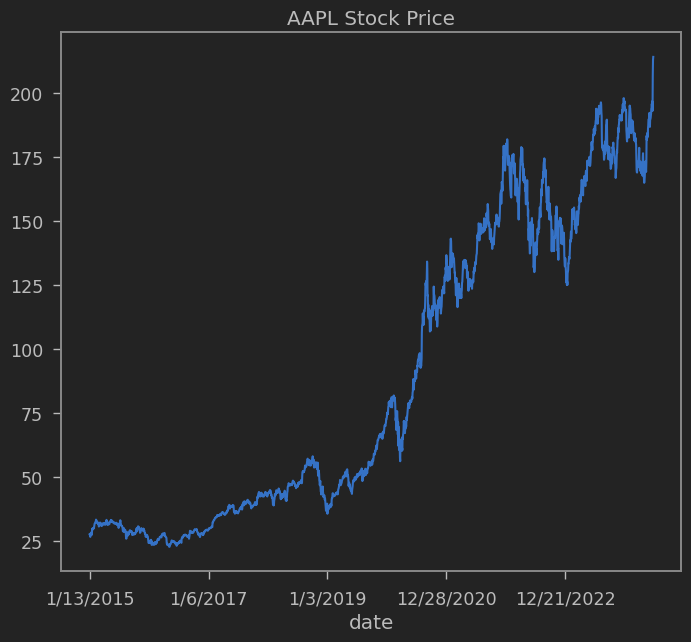

In [17]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
otherdf['close'].plot(title= "AAPL Stock Price")


Lets spice this up a little to visualize where exactly we want to buy or sell, based on the labels.

This will be a verification that our labels are as we expect them to be.

<Axes: xlabel='date', ylabel='close'>

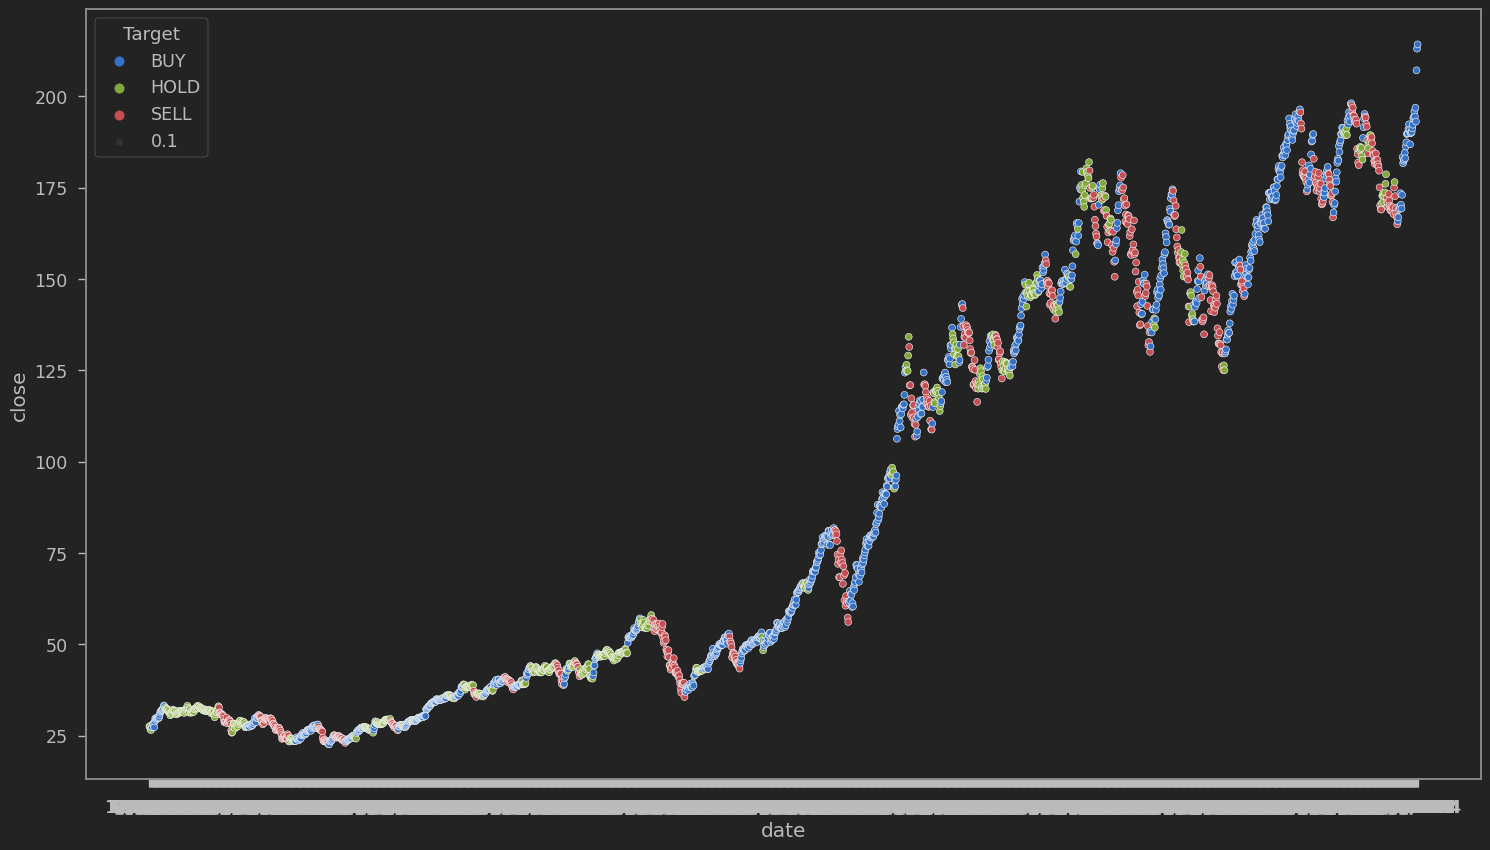

In [28]:
#plt.figure(figsize=(18,10))
fig, ax = plt.subplots(18,10)
ax =sns.lineplot(data=otherdf, x=otherdf.index, y='close', c='black')
sns.scatterplot(data=otherdf, x=otherdf.index, y='close', hue='Target', size=0.1 )

Now lets look at some relationships

In [29]:
stockdf.columns

Index(['pct_Diff_from_6_day_SMA', 'Slope_6_day_SMA', 'Slope_4_day_SMA',
       'CHLI_1Y', 'CHLI_1M', 'CHLI_2W', 'CHLI_1W', 'ADV_Issues', 'ADV_Vol',
       'ADV_Issues_Comp', 'ADV_Vol_Comp', 'ImpVol', 'daysToEarnings',
       '2yr_pct_chg', '10yr_pct_chg', '10yr_2yr_diff', '10_2_diff_pct_chg',
       '10_day_SMA', '20_day_SMA', '10_day_SMA_slope', '20_day_SMA_slope',
       'price_chg', 'vix_chg'],
      dtype='object')

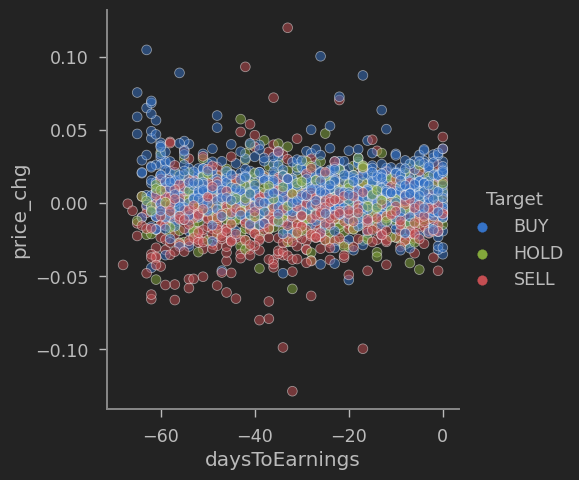

In [46]:
sns.relplot(data=stockdf, x='daysToEarnings', y='price_chg', hue='Target', alpha=0.5)
# this is probably not useful, since they are both slopes, so should be a nice separation

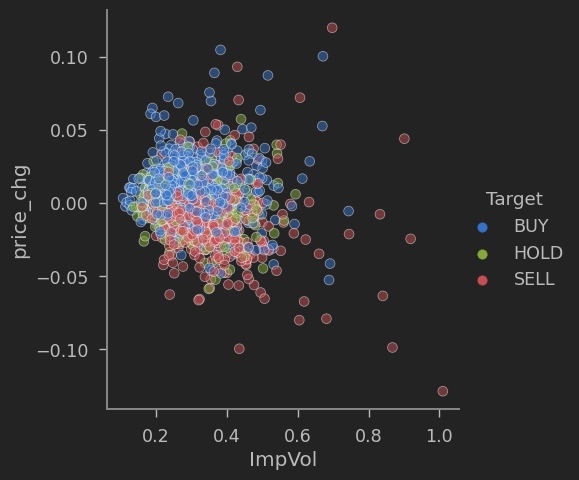

In [35]:
sns.relplot(data=stockdf, x='ImpVol', y='price_chg', hue='Target', alpha=0.5)

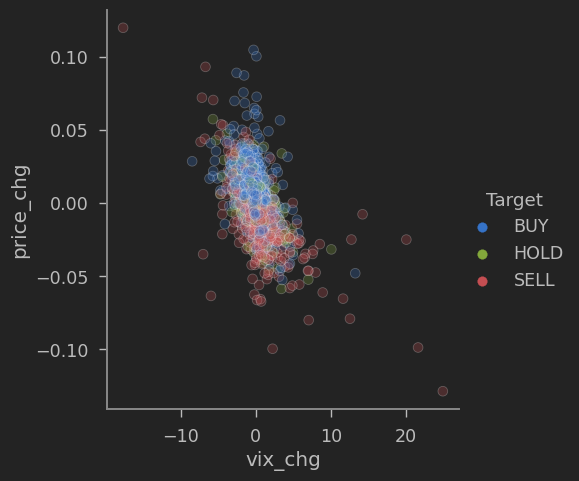

In [38]:
sns.relplot(data=stockdf, x='vix_chg', y='price_chg', hue='Target', alpha=0.25)

This appears to be useful as there seems to be some correlation betwen vix changes and price changes, lets look at the un-stationarized data, for kicks.

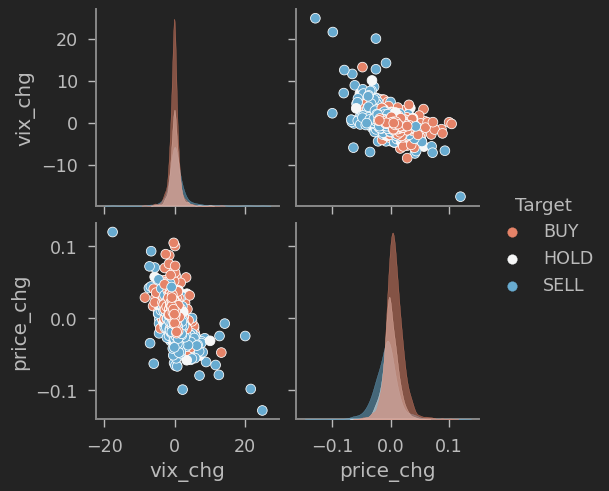

In [63]:
sns.pairplot(data=stockdf, vars=['vix_chg', 'price_chg'], kind='scatter',hue='Target',palette='RdBu', diag_kws={'alpha':0.5})

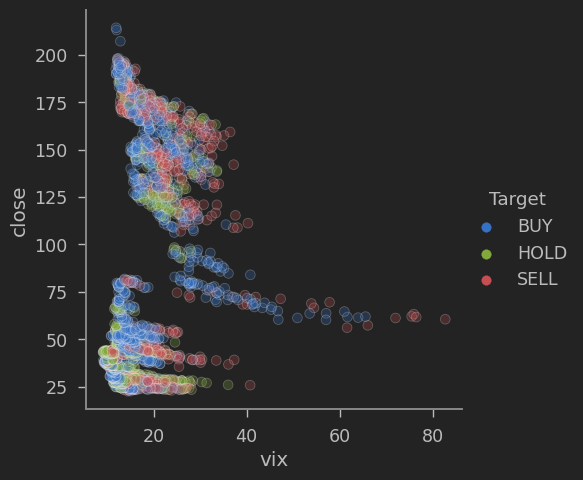

In [39]:
sns.relplot(data=otherdf, x='vix', y='close', hue='Target', alpha=0.25)

Other than it looks kinda like Westeros, I'm not sure much can be gleaned from it

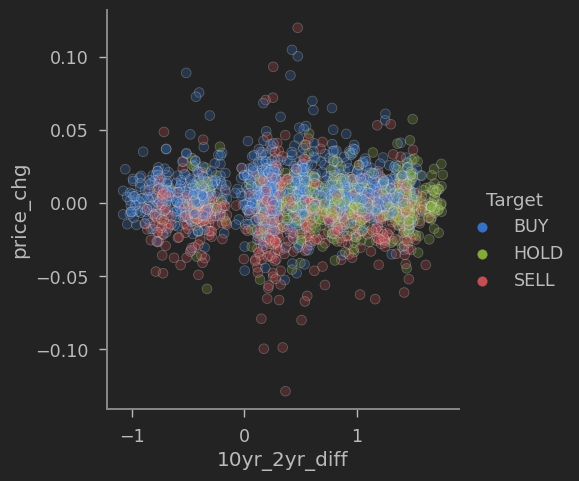

In [40]:
sns.relplot(data=stockdf, x='10yr_2yr_diff', y='price_chg', hue='Target', alpha=0.25)

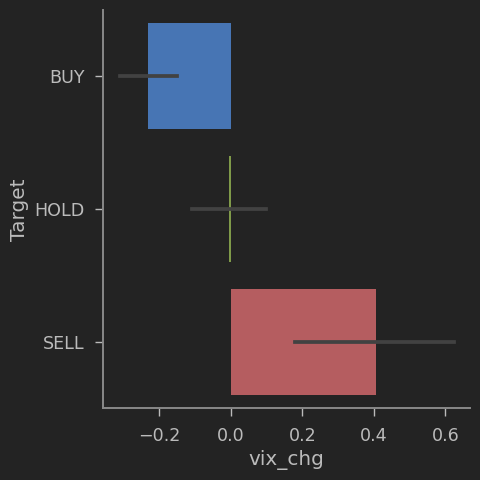

In [49]:
sns.catplot(data=stockdf, x="vix_chg", y="Target", kind='bar')

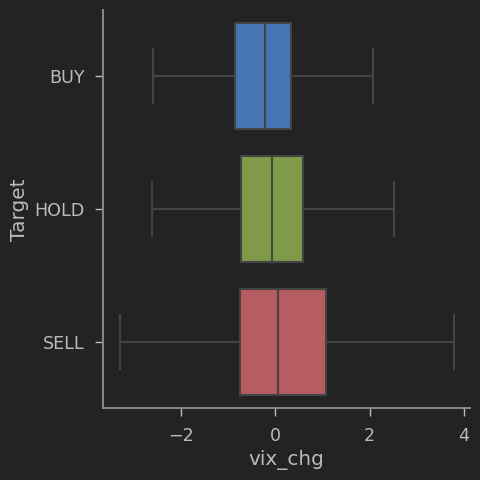

In [51]:
sns.catplot(data=stockdf, x="vix_chg", y="Target", kind='box', sym="")

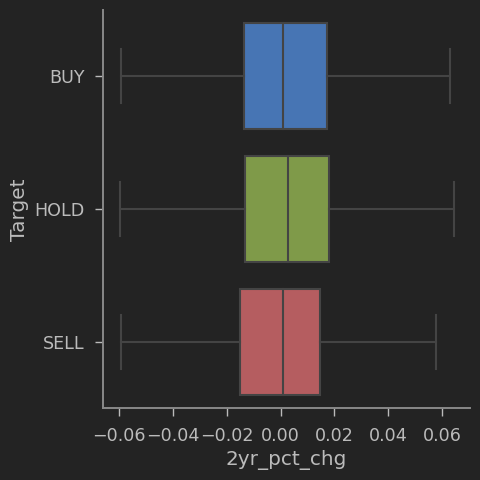

In [58]:
sns.catplot(data=stockdf, x="2yr_pct_chg", y="Target", kind='box', sym="")

In [53]:
stockdf.columns

Index(['pct_Diff_from_6_day_SMA', 'Slope_6_day_SMA', 'Slope_4_day_SMA',
       'CHLI_1Y', 'CHLI_1M', 'CHLI_2W', 'CHLI_1W', 'ADV_Issues', 'ADV_Vol',
       'ADV_Issues_Comp', 'ADV_Vol_Comp', 'ImpVol', 'daysToEarnings',
       '2yr_pct_chg', '10yr_pct_chg', '10yr_2yr_diff', '10_2_diff_pct_chg',
       '10_day_SMA', '20_day_SMA', '10_day_SMA_slope', '20_day_SMA_slope',
       'price_chg', 'vix_chg', 'Target'],
      dtype='object')

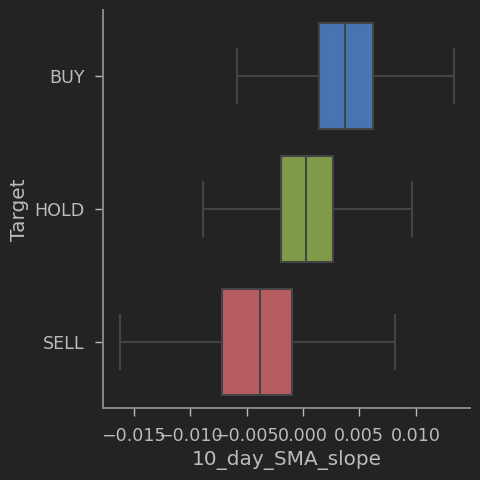

In [54]:
sns.catplot(data=stockdf, x="10_day_SMA_slope", y="Target", kind='box', sym="")

This was expected.  Of course when the price has been doing up, you'll get more buying and vice versa.

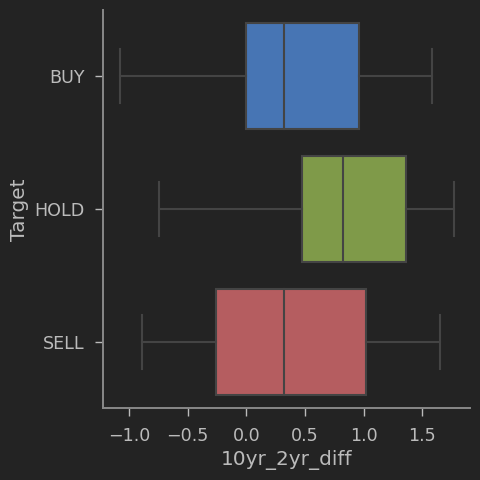

In [55]:
sns.catplot(data=stockdf, x="10yr_2yr_diff", y="Target", kind='box', sym="")